## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Fri Jan 31 18:02:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.78       Driver Version: 410.78       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   36C    P8    32W / 300W |    981MiB / 10989MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
"""
Your code here
"""
from sklearn import preprocessing
def preproc_x(x, flatten=True):
    #x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
        min_max_scaler = preprocessing.MinMaxScaler()
        x = min_max_scaler.fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [10]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
  
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["binary_accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.9675 - binary_accuracy: 0.9009 - val_loss: 1.8882 - val_binary_accuracy: 0.9023
Epoch 2/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.7534 - binary_accuracy: 0.9043 - val_loss: 1.6940 - val_binary_accuracy: 0.9059
Epoch 3/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.6499 - binary_accuracy: 0.9070 - val_loss: 1.6036 - val_binary_accuracy: 0.9092
Epoch 4/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.5897 - binary_accuracy: 0.9091 - val_loss: 1.5868 - val_binary_accuracy: 0.9101
Epoch 5/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.5373 - binary_accuracy: 0.9112 - val_loss: 1.5281 - val_binary_accuracy: 0.9116
Epoch 6/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.4995 - binary_accuracy: 0.9125 - val_loss: 1.5305 - val_bi

50000/50000 [==============================] - 3s 55us/step - loss: 0.6594 - binary_accuracy: 0.9561 - val_loss: 1.8048 - val_binary_accuracy: 0.9130
Epoch 52/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.6446 - binary_accuracy: 0.9572 - val_loss: 1.8291 - val_binary_accuracy: 0.9125
Epoch 53/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.6376 - binary_accuracy: 0.9574 - val_loss: 1.8917 - val_binary_accuracy: 0.9111
Epoch 54/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.6252 - binary_accuracy: 0.9581 - val_loss: 1.8091 - val_binary_accuracy: 0.9129
Epoch 55/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.6310 - binary_accuracy: 0.9577 - val_loss: 1.8350 - val_binary_accuracy: 0.9122
Epoch 56/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.6122 - binary_accuracy: 0.9588 - val_loss: 1.8966 - val_binary_accuracy: 0.9099
Epoch 57/100
50000/50000 [=========

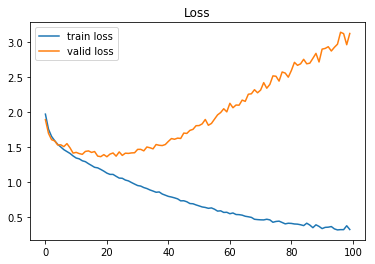

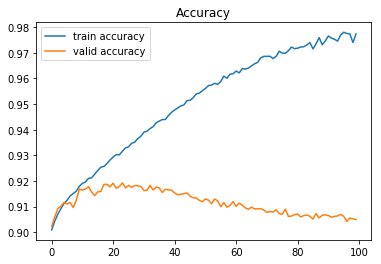

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["binary_accuracy"]
valid_acc = model.history.history["val_binary_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()